In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
np.set_printoptions(threshold=np.inf)

In [3]:
X,y=fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [4]:
X.shape

(70000, 784)

In [5]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
y[0]

'5'

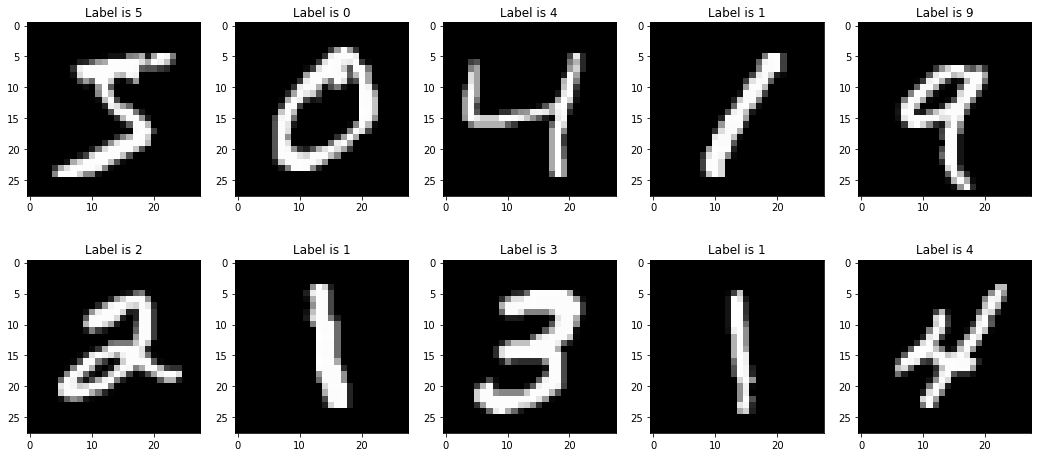

In [7]:
fig,axs=plt.subplots(2,5,figsize=(18, 8))
axs=axs.ravel()

for i in range(0,10):
    image=X[i]
    image=np.array(image,dtype='int')
    pixels=image.reshape((28,28))
    axs[i].imshow(pixels,cmap='gray')
    axs[i].set_title('Label is '+str(y[i]))


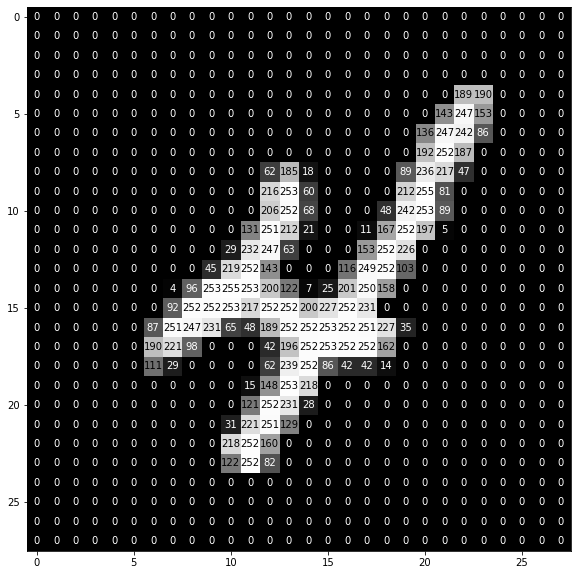

In [8]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

first_image = X[9]
first_image = np.array(first_image, dtype='int')
pixels = first_image.reshape((28, 28)) 
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(pixels, ax)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

### Applying PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca=PCA(.95,random_state=50)

In [13]:
pca.fit(X_train)

PCA(n_components=0.95, random_state=50)

In [14]:
train_img=pca.transform(X_train)
test_img=pca.transform(X_test)

In [16]:
print(train_img.shape)
print(test_img.shape)

(49000, 154)
(21000, 154)


### Applying LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression(random_state=100)

In [19]:
lr.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [20]:
pred=lr.predict(X_test)

In [25]:
train_img.shape[1]

154

#### Classification report

In [26]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2035
           1       0.96      0.98      0.97      2379
           2       0.93      0.89      0.91      2104
           3       0.91      0.90      0.90      2193
           4       0.93      0.93      0.93      2104
           5       0.90      0.85      0.88      1860
           6       0.93      0.95      0.94      2094
           7       0.93      0.94      0.94      2155
           8       0.87      0.89      0.88      2004
           9       0.91      0.91      0.91      2072

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000



In [23]:
#defining list of Variance

In [28]:
pca_var=[1.0,.99,.95,.90,.85,.80,.75]

#defining empty lists
accuracy_list=[]
f1_list=[]
pca_components=[]
training_time=[]

In [29]:
for i in pca_var:
    if i==1.0:
        train_img=X_train
        test_img=X_test
    else:
        pca=PCA(i,random_state=50)
        pca.fit(X_train)
        train_img=pca.transform(X_train)
        test_img=pca.transform(X_test)
        
    model=LogisticRegression(random_state=100)
    model.fit(train_img,y_train)
    
    pred=model.predict(test_img)
    
    accuracy_list.append(np.round(accuracy_score(y_test,pred),4))
    f1_list.append(np.round(f1_score(y_test,pred,average='weighted'),4))
    pca_components.append(train_img.shape[1])

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [30]:
comparison_dict={'Variance Retained':pca_var,'Number of Components':pca_components,
                    'Accuracy Score':accuracy_list,'F1 Score':f1_list}
comparison=pd.DataFrame(comparison_dict)
comparison

,Variance Retained,Number of Components,Accuracy Score,F1 Score
0,1.00,784,0.9221,0.9219
1,0.99,330,0.9202,0.9199
2,0.95,154,0.9194,0.9191
3,0.90,87,0.9127,0.9122
4,0.85,59,0.9114,0.9111
5,0.80,43,0.9045,0.9042
6,0.75,33,0.8962,0.8959


In [31]:
import pickle as pk

In [33]:
pca=PCA(0.90,random_state=50)
pca.fit(X_train)
train_img=pca.transform(X_train)
test_img=pca.transform(X_test)
pk.dump(pca,open('pca.pkl','wb'))

In [34]:
model=LogisticRegression(random_state=100)
model.fit(train_img,y_train)
pk.dump(model,open('model.pkl','wb'))

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
pred=model.predict(test_img)

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2035
           1       0.93      0.98      0.95      2379
           2       0.93      0.88      0.91      2104
           3       0.92      0.88      0.90      2193
           4       0.91      0.93      0.92      2104
           5       0.89      0.85      0.87      1860
           6       0.92      0.95      0.93      2094
           7       0.91      0.94      0.93      2155
           8       0.88      0.85      0.86      2004
           9       0.90      0.89      0.90      2072

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000

